In [7]:
import pystan
import numpy as np
import matplotlib.pyplot as plt

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [3]:
sm = pystan.StanModel(model_code=schools_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


In [4]:
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

Inference for Stan model: anon_model_19a09b474d1901f191444eaf8a6b8ce2.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         8.08    0.17   5.28  -2.04   4.64   8.15  11.55  18.16    925    1.0
tau        6.38    0.19   5.36   0.24   2.49   5.02   8.91  19.68    780    1.0
eta[1]     0.42    0.02   0.98  -1.62  -0.21   0.42   1.03   2.31   1973    1.0
eta[2]   5.7e-3    0.02   0.84  -1.59  -0.57 5.7e-3   0.58   1.66   1790    1.0
eta[3]    -0.21    0.02   0.91  -1.91  -0.85  -0.21    0.4   1.56   2163    1.0
eta[4]    -0.05    0.02   0.88  -1.78  -0.64  -0.04   0.54   1.61   2137    1.0
eta[5]    -0.34    0.02   0.89  -2.06  -0.93  -0.35   0.24   1.42   1653    1.0
eta[6]     -0.2    0.02   0.89  -1.94  -0.81  -0.19   0.38   1.59   2178    1.0
eta[7]     0.36    0.02   0.84  -1.35   -0.2   0.39   0.92   1.99   1974    1.0
eta[8]     0.

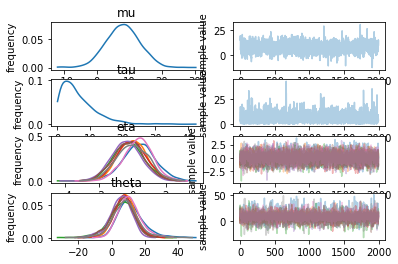

array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'tau'}>,
        <AxesSubplot:title={'center':'tau'}>],
       [<AxesSubplot:title={'center':'eta\n0'}>,
        <AxesSubplot:title={'center':'eta\n0'}>],
       [<AxesSubplot:title={'center':'eta\n1'}>,
        <AxesSubplot:title={'center':'eta\n1'}>],
       [<AxesSubplot:title={'center':'eta\n2'}>,
        <AxesSubplot:title={'center':'eta\n2'}>],
       [<AxesSubplot:title={'center':'eta\n3'}>,
        <AxesSubplot:title={'center':'eta\n3'}>],
       [<AxesSubplot:title={'center':'eta\n4'}>,
        <AxesSubplot:title={'center':'eta\n4'}>],
       [<AxesSubplot:title={'center':'eta\n5'}>,
        <AxesSubplot:title={'center':'eta\n5'}>],
       [<AxesSubplot:title={'center':'eta\n6'}>,
        <AxesSubplot:title={'center':'eta\n6'}>],
       [<AxesSubplot:title={'center':'eta\n7'}>,
        <AxesSubplot:title={'center':'eta\n7'}>],
       [<AxesSubplot:tit

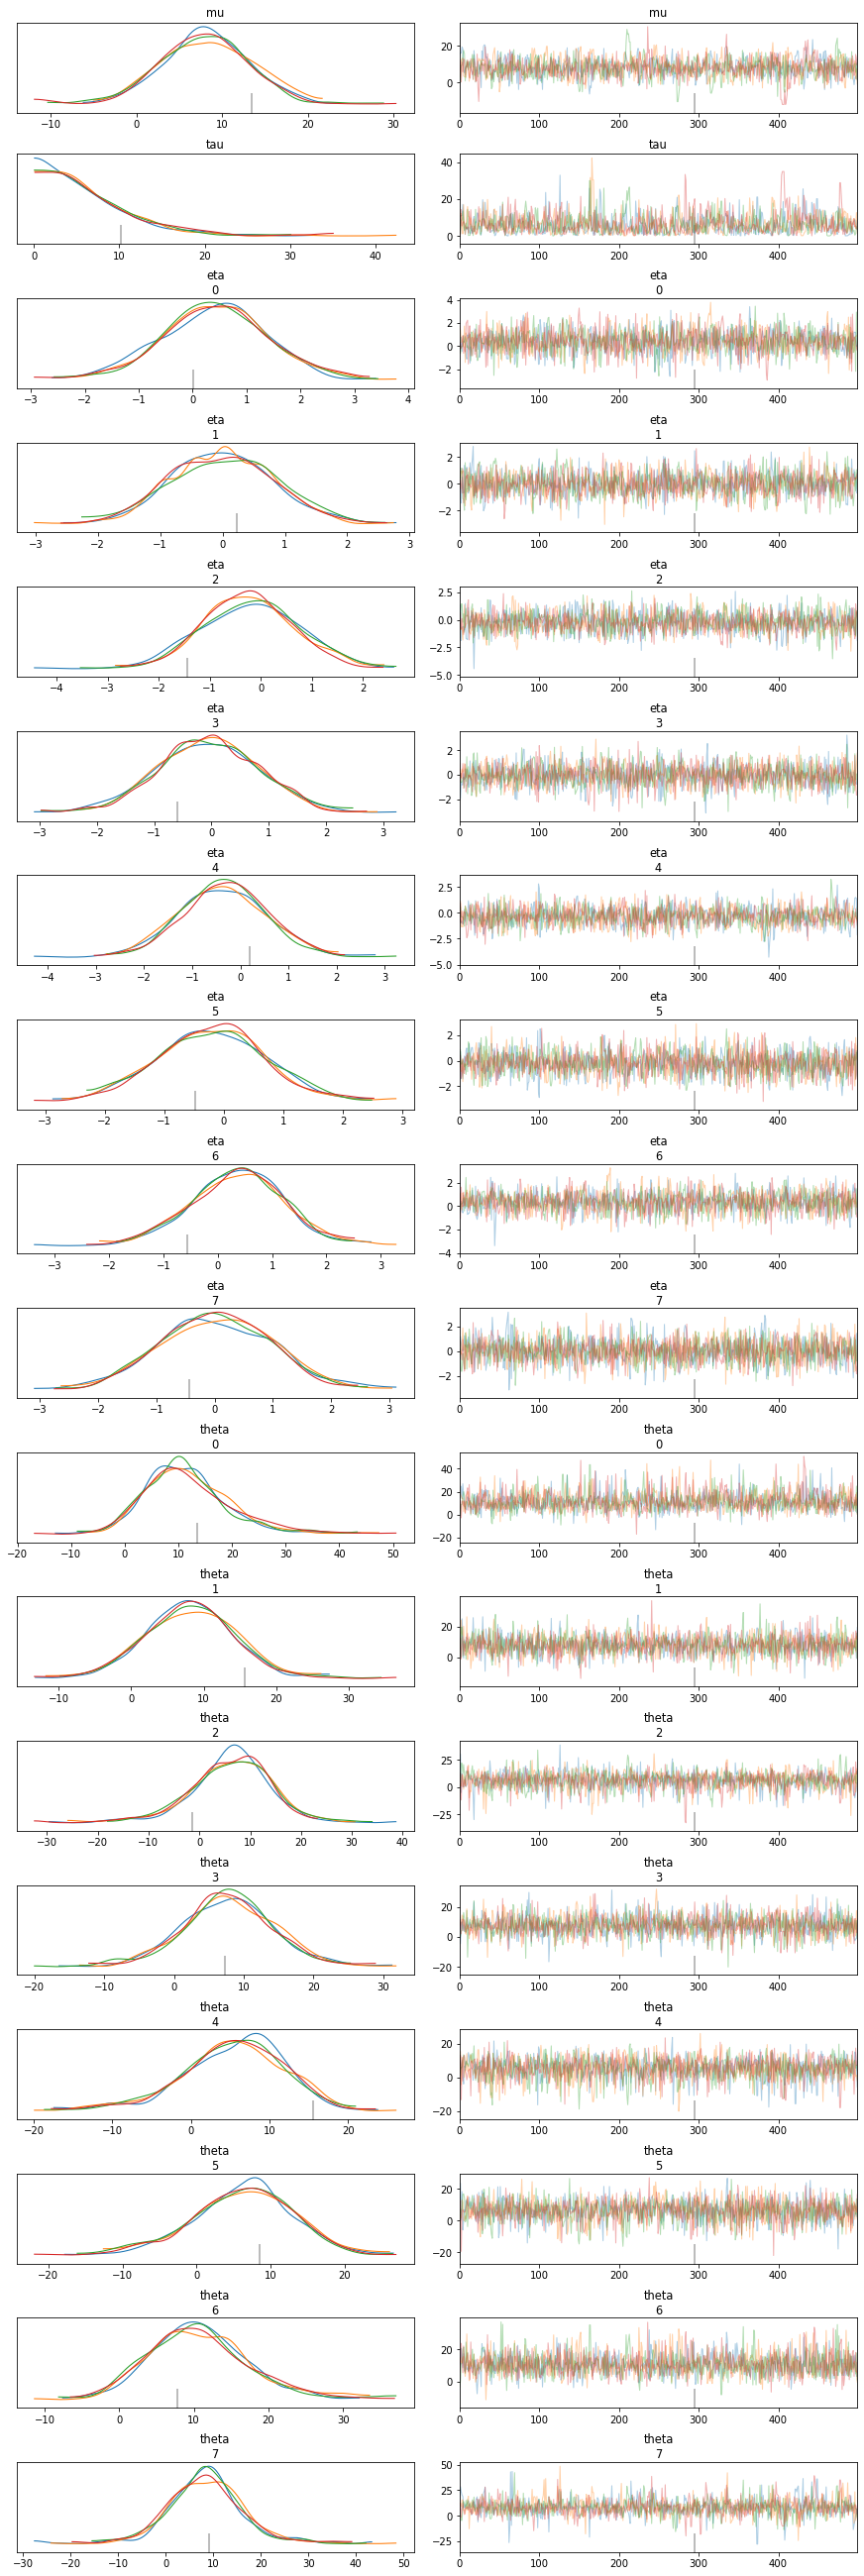

In [8]:
print(fit)

eta = fit.extract(permuted=True)['eta']
np.mean(eta, axis=0)

# if matplotlib is installed (optional, not required), a visual summary and
# traceplot are available
fit.plot()
plt.show()

# updated traceplot can be plotted with
import arviz as az
az.plot_trace(fit)